dict_keys(['description', 'driverShortName', 'driverLongName', 'files', 'size', 'coordinateSystem', 'geoTransform', 'metadata', 'cornerCoordinates', 'wgs84Extent', 'bands', 'stac'])
[12.50387, 1.54263877715e-05, 0.0, 55.80383, 0.0, -1.54223652454e-05]
{'upperLeft': [12.50387, 55.80383], 'lowerLeft': [12.50387, 55.76549], 'lowerRight': [12.54222, 55.76549], 'upperRight': [12.54222, 55.80383], 'center': [12.523045, 55.78466]}
55.80383 12.50387


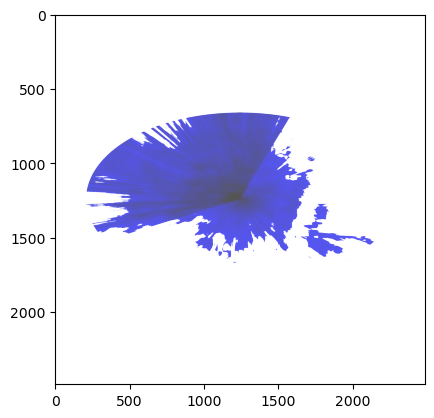

In [24]:
from osgeo import gdal
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ds = gdal.Open('cloudRF_tiff/0522224354_My_Network_Site.4326.tiff', gdal.GA_ReadOnly)
ds = gdal.Open('cloudRF_tiff/0522224354_My_Network_Site.4326.tiff', gdal.GA_ReadOnly)
tiff_dict = gdal.Info(ds, options=gdal.InfoOptions(format='json'))
print(tiff_dict.keys())
print(tiff_dict['geoTransform'])
print(tiff_dict['cornerCoordinates'])
lat_per_pixel, long_per_pixel = abs(float(tiff_dict['geoTransform'][-1])), \
                                abs(float(tiff_dict['geoTransform'][1]))
lat_TL, long_TL = tiff_dict['cornerCoordinates']['upperLeft'][::-1]
print(lat_TL, long_TL)

tiff_img = Image.open('cloudRF_tiff/0522224354_My_Network_Site.4326.tiff')
plt.imshow(tiff_img)

In [25]:
import csv

reader_out = csv.reader(open('../raw_data/output_matrix.csv', 'r'), delimiter=',')
next(reader_out)

reader_in = csv.reader(open('../raw_data/feature_matrix.csv', 'r'), delimiter=',')
next(reader_in)

lat_arr_actual, long_arr_actual, ss_arr_actual = [], [], []
for row_out, row_in in zip(reader_out, reader_in):
    if int(row_in[-2]) == 1:
        ss_arr_actual.append(float(row_out[-1]) - 18)
        lat_arr_actual.append(float(row_in[2]))
        long_arr_actual.append(float(row_in[1]))
# output_matrix.csv has each row organised as: ,SINR,RSRP,RSRQ,Power
# feature_matrix: ,Longitude,Latitude,Speed,Distance,Distance_x,Distance_y,PCI,PCI_64,PCI_65,PCI_302

col_names1 = ['LATITUDE', 'LONGITUDE', 'VALUE']
df_actual_data = pd.DataFrame(list(zip(lat_arr_actual, long_arr_actual, ss_arr_actual)),
                              columns=col_names1)
len(df_actual_data['LATITUDE'])

22107

In [26]:
def loc_to_pow(img_arr, lat, long, lat_TL_=lat_TL, long_TL_=long_TL, lat_per_pixel_=lat_per_pixel,
               long_per_pixel_=long_per_pixel):
    d_lat, d_long = lat - lat_TL_, long - long_TL_
    r, c = d_lat / lat_per_pixel_, d_long / long_per_pixel_
    return -(abs(img_arr[r, c, 2]) * 3 + 40)

SyntaxError: incomplete input (936628580.py, line 1)